In [7]:
import SDM_eval
import nn_classes
import torch
import importlib
import torch.nn as nn
import pandas as pd
importlib.reload(SDM_eval)
importlib.reload(nn_classes)

import sys
sys.path.append("/home/adam/source/geo-clip/geoclip/")
from model import GeoCLIP
from geoclip import LocationEncoder

device="cuda"
data_path="embeddings_data_and_dictionaries/Embeddings/swiss_bioclip_embeddings/swiss_data_bioclip.h5"
fourier_dim=64
covariate_dim=13
hidden_dim=256
dim_emb=512


pos_enc = LocationEncoder()

model = nn_classes.DoubleNetwork_V2(pos_enc, dim_hidden=768, dim_output=dim_emb).to(device)

state_dict = torch.load("Model_saves/geoclip_pos_enc/model.pt")
model.load_state_dict(state_dict)



/home/adam/anaconda3/envs/geoclip/lib/python3.12/site-packages/geoclip/model/location_encoder.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch

<All keys matched successfully>

In [6]:
import SDM_eval
import nn_classes
import torch
import importlib
import torch.nn as nn
importlib.reload(SDM_eval)
importlib.reload(nn_classes)

import sys
sys.path.append("/home/adam/source/geo-clip/geoclip/")
from model import GeoCLIP
from geoclip import LocationEncoder

device="cuda"
data_path="embeddings_data_and_dictionaries/Embeddings/swiss_bioclip_embeddings/swiss_data_bioclip.h5"
fourier_dim=64
covariate_dim=13
hidden_dim=256
dim_emb=128
pos_encoder = nn_classes.Fourier_MLP(original_dim=2,fourier_dim=fourier_dim, hidden_dim=hidden_dim, output_dim=dim_emb,scales=None)

#pos_encoder= nn_classes.RFF_MLPs(original_dim=2, fourier_dim=dim_fourier_encoding, hidden_dim=dim_hidden, output_dim=dim_emb,M=8,sigma_min=2,sigma_max=256, number_layers=4)
#pos_encoder=utils.RFF_MLPs( original_dim=2, fourier_dim=dim_fourier_encoding, hidden_dim=dim_hidden, output_dim=512,M=8,sigma_min=1,sigma_max=256).to(device)

model= nn_classes.DoubleNetwork_V2(pos_encoder,dim_hidden=768,dim_output=dim_emb).to(device)
state_dict = torch.load("/home/adam/source/CLIP/Model_saves/small_pos_enc_correct_frequencies/model.pt")
#/home/adam/source/CLIP/Model_saves/small_pos_enc_bioCLIP/model.pt # wrong frequencies
model.load_state_dict(state_dict)
pos_enc=model.pos_encoder.to(device)

/tmp/ipykernel_3258145/3064164473.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("/home/adam/source/CLIP/Model_saves/small_pos_enc_correct_freq

FileNotFoundError: [Errno 2] No such file or directory: '/home/adam/source/CLIP/Model_saves/small_pos_enc_correct_frequencies/model.pt'

(48831, 2)


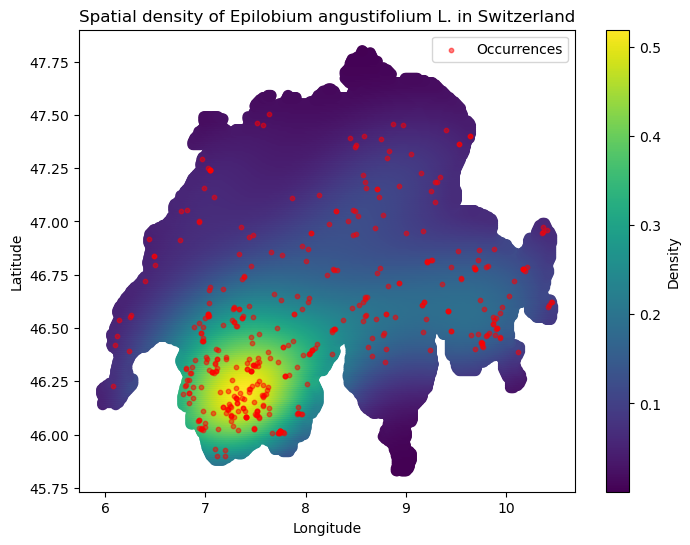

(25719, 2)


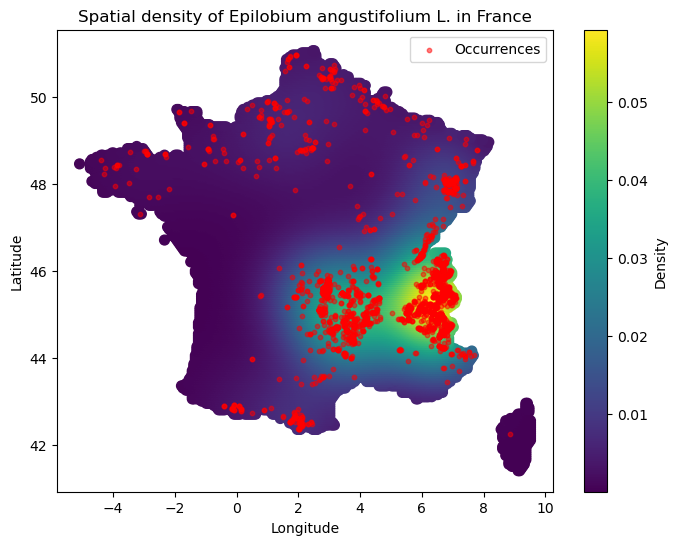

In [ ]:
import utils
import importlib
import pandas as pd
importlib.reload(utils)
dictionary=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_sciName_countrycode")
specie_name= "Epilobium angustifolium L." #mountain flower, like 17
utils.plot_species_density(dictionary,specie_name, "Switzerland", grid_resolution=0.01, bandwidth=0.5)
utils.plot_species_density(dictionary, specie_name, "France", grid_resolution=0.05, bandwidth=0.5)

(25719, 2)


/home/adam/source/CLIP/utils.py:558: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


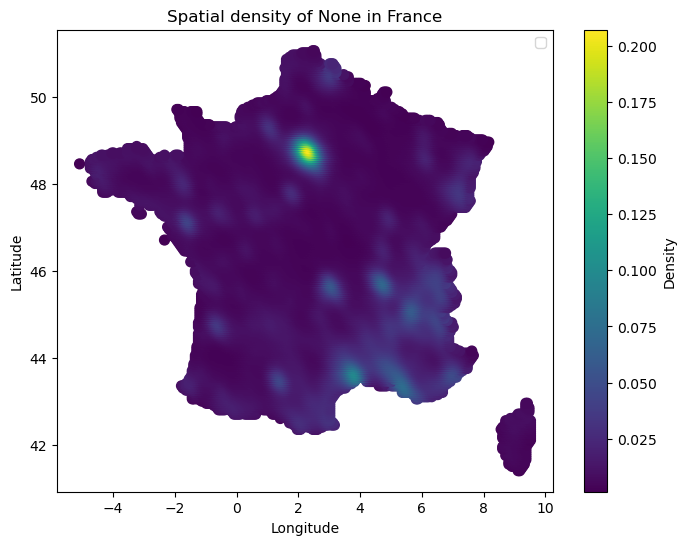

In [23]:
#Density of all points
import utils
import importlib
import pandas as pd
importlib.reload(utils)
dictionary=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_sciName_countrycode")
specie_name= None
#utils.plot_species_density(dictionary,specie_name, "Switzerland", grid_resolution=0.01, bandwidth=None,plot_points=False)
utils.plot_species_density(dictionary, specie_name, "France", grid_resolution=0.05,bandwidth=0.03,plot_points=False) #change bandwith? None give the rule of thumb in gaussian_kde documentation

(25719, 2)


/home/adam/source/CLIP/utils.py:585: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


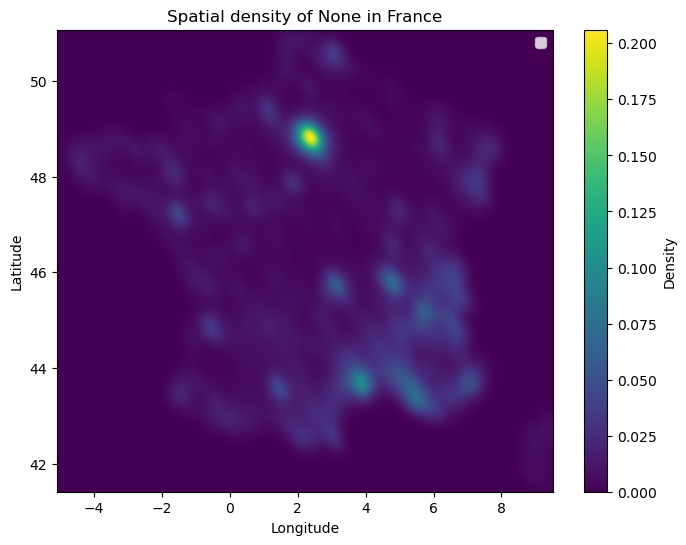

In [24]:
#Density of all points
import utils
import importlib
import pandas as pd
importlib.reload(utils)
dictionary=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_sciName_countrycode")
specie_name= None
#utils.plot_species_density(dictionary,specie_name, "Switzerland", grid_resolution=0.01, bandwidth=None,plot_points=False)
utils.plot_species_density(dictionary, specie_name, "France", grid_resolution=0.05,bandwidth=0.03,plot_points=False) #change bandwith? None give the rule of thumb in gaussian_kde documentation

(25719, 2)
sims shape: torch.Size([1, 25719])
France


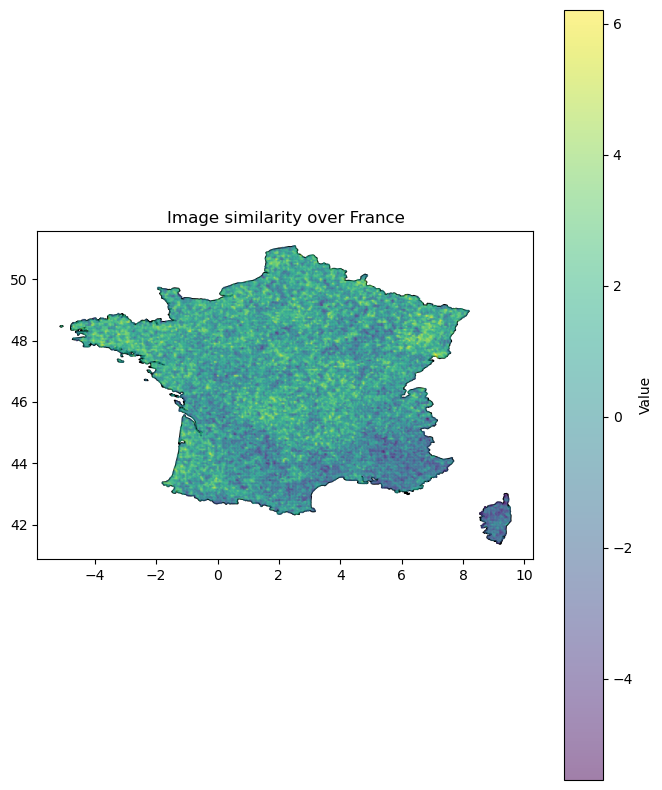

(25719, 2)
sims shape: torch.Size([1, 25719])
France


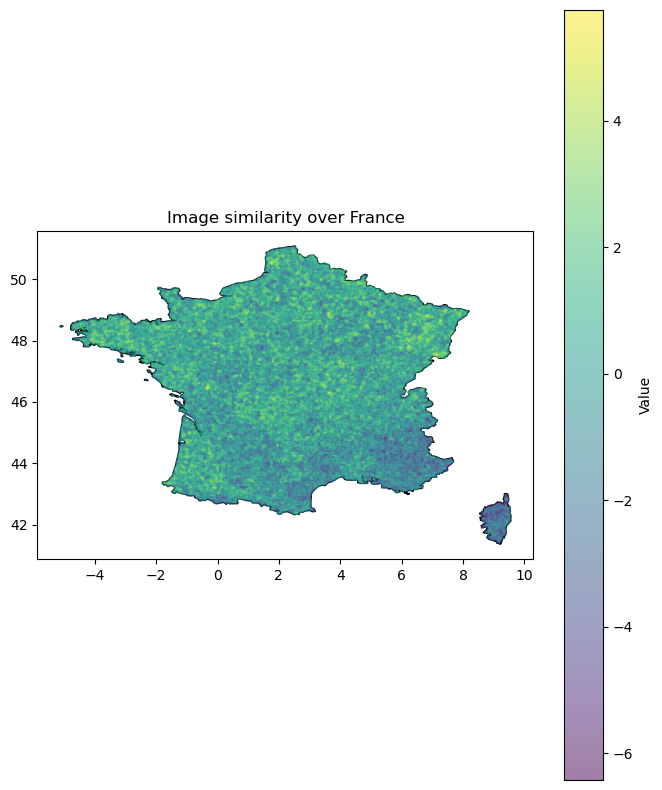

(48831, 2)
sims shape: torch.Size([1, 48831])
Switzerland


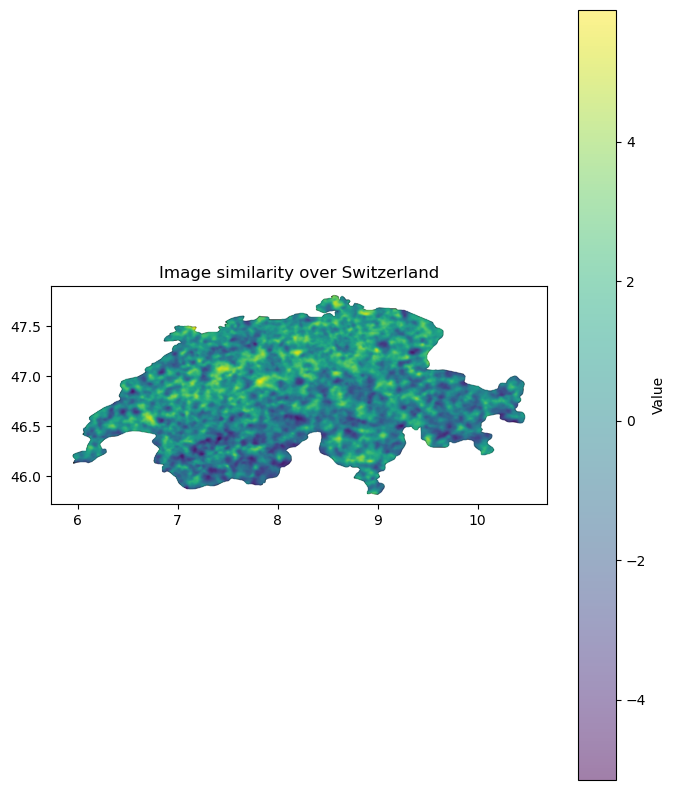

(48831, 2)
sims shape: torch.Size([1, 48831])
Switzerland


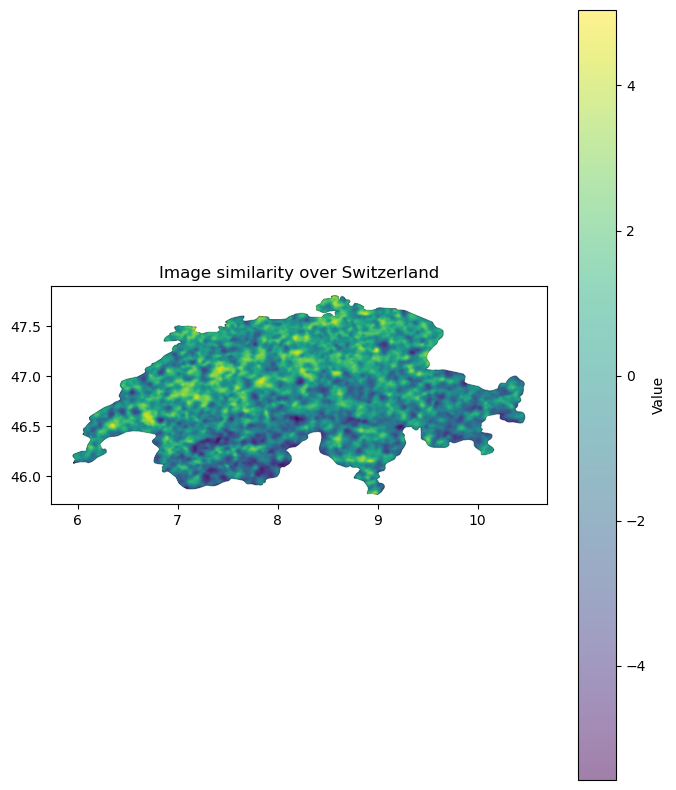

In [2]:
import utils
import importlib
importlib.reload(utils)
image_path="/home/adam/source/CLIP/swiss_images/all_images/74_2974343004.jpg"
utils.map_image(model, image_path, country="France", device="cuda", grid_resolution=0.05, save_path=None)
image_path="/home/adam/source/CLIP/swiss_images/all_images/40_5110199566.jpg"
utils.map_image(model, image_path, country="France", device="cuda", grid_resolution=0.05, save_path=None)
image_path="/home/adam/source/CLIP/swiss_images/all_images/74_2974343004.jpg"
utils.map_image(model, image_path, country="Switzerland", device="cuda", grid_resolution=0.01, save_path=None)
image_path="/home/adam/source/CLIP/swiss_images/all_images/40_5110199566.jpg"
utils.map_image(model, image_path, country="Switzerland", device="cuda", grid_resolution=0.01, save_path=None)
#/home/adam/source/CLIP/swiss_images/all_images/10_2645236450.jpg #ortie NON EN FAIT, menthe?
#/home/adam/source/CLIP/swiss_images/all_images/40_5110199566.jpg #autre ortie
#/home/adam/source/CLIP/swiss_images/all_images/74_2974343004.jpg # actual ortie
#"swiss_images/all_images/19_2643809723.jpg" #noisettier?

Country:      Unnamed: 0      gbifID                                         identifier  \
68          68  5110233737  https://bs.plantnet.org/image/o/3978b5ca4218fe...   

    decimalLatitude  decimalLongitude     scientificName countryCode  \
68         47.12848          7.904037  Viola tricolor L.          CH   

    higherClassification  vernacularName  kingdom        phylum  \
68                   NaN             NaN  Plantae  Tracheophyta   

            class         order     family  genus         species  \
68  Magnoliopsida  Malpighiales  Violaceae  Viola  Viola tricolor   

                                         taxa_bioclip  
68  Plantae Tracheophyta Magnoliopsida Malpighiale...  
tensor([68])


/home/adam/anaconda3/envs/geoclip/lib/python3.12/site-packages/geoclip/model/location_encoder.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch

(48831, 2)
sims shape: torch.Size([1, 48831])
Switzerland


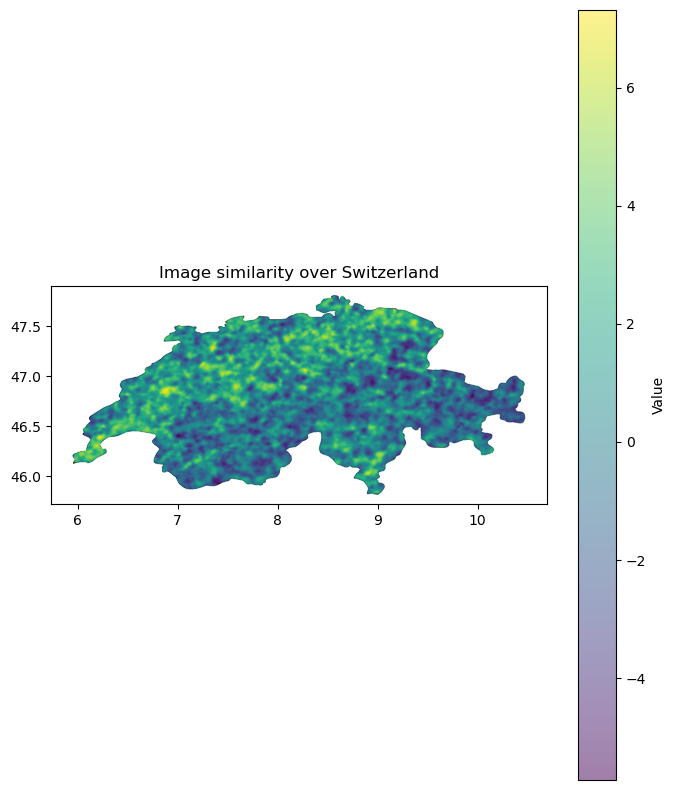

In [47]:
import utils
import importlib
from geoclip import LocationEncoder
import open_clip
import torch
import nn_classes
importlib.reload(nn_classes)
importlib.reload(utils)
import pandas as pd


dataset_path="embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/difference_embeddings.h5"
emb_vector, coord, idx = utils.get_example(dataset_path, 18) #e.g 8 or 18 for a sample in CH
dictionary=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_all_taxons")
print("Country: ",dictionary.iloc[idx])
print(idx)
emb_vector=emb_vector.to("cuda").unsqueeze(dim=0) #careful with hdf5 opening


dim_emb=512
pos_encoder =LocationEncoder(from_pretrained=True)
model= nn_classes.DoubleNetwork_V2(pos_encoder=pos_encoder, dim_hidden=768, dim_output=dim_emb).to("cuda")
state_dict = torch.load("Model_saves/difference_embeddings/model.pt")
model.load_state_dict(state_dict)
utils.map_embedding(model, emb_vector, country="Switzerland", device="cuda", grid_resolution=0.01, save_path=None)


### Comparison epoch 4 VS epoch 120

/tmp/ipykernel_3912445/2806921489.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("Model_saves/geoclip_pos_enc/Checkpoints/geoclip_pos_enc_check

(71456, 2)
sims shape: torch.Size([1, 71456])
France


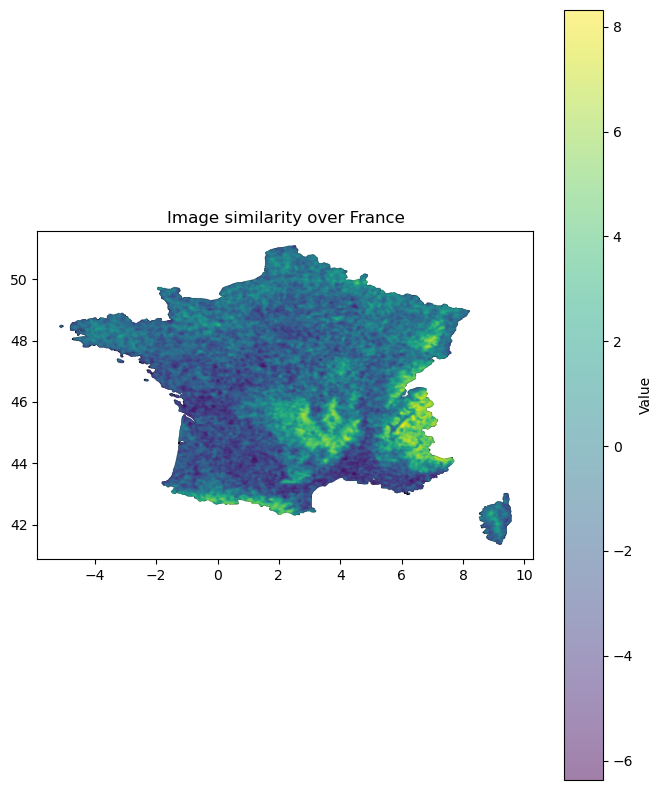

(48831, 2)
sims shape: torch.Size([1, 48831])
Switzerland


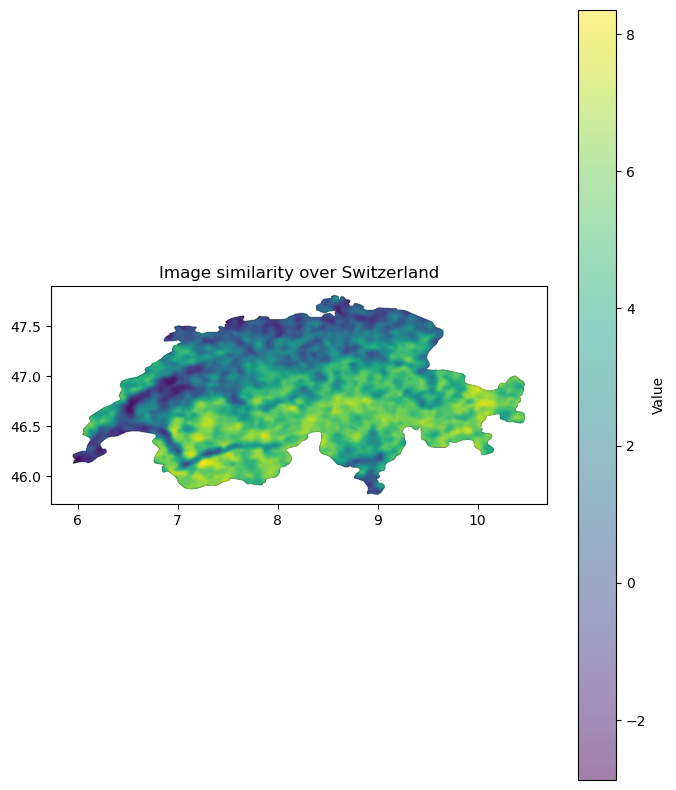

/tmp/ipykernel_3912445/2806921489.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("Model_saves/geoclip_pos_enc/model.pt")


(71456, 2)
sims shape: torch.Size([1, 71456])
France


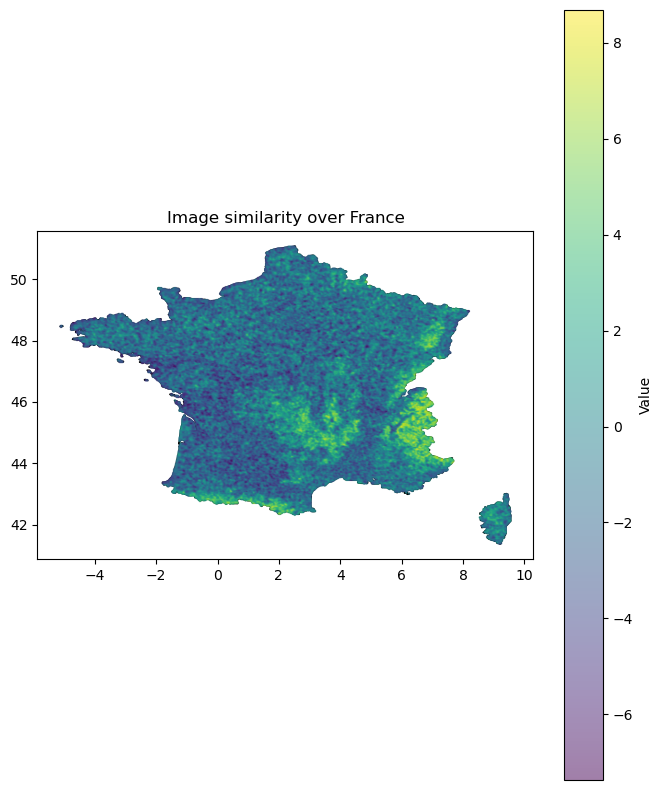

(48831, 2)
sims shape: torch.Size([1, 48831])
Switzerland


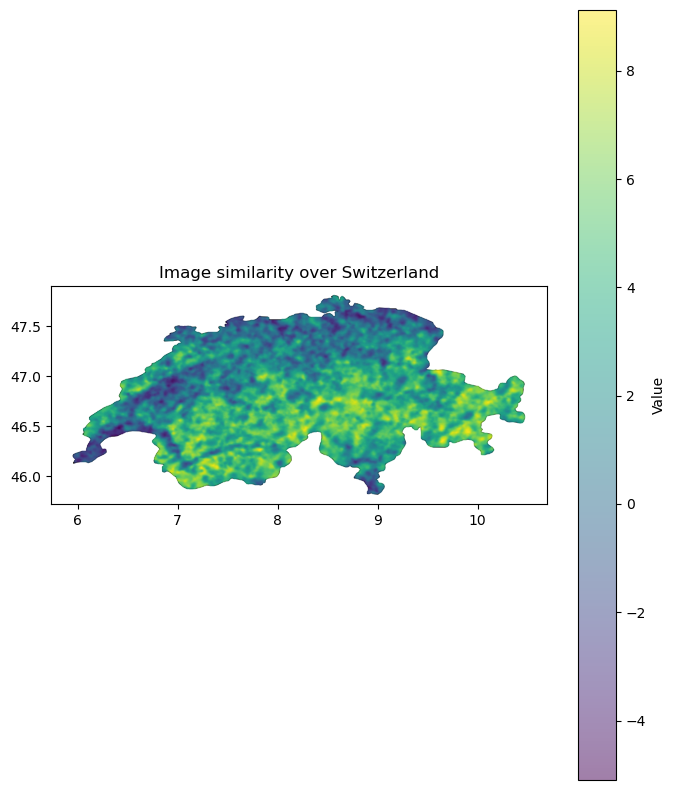

In [51]:
import utils
import importlib
from geoclip import LocationEncoder
import open_clip
import torch
import nn_classes
importlib.reload(nn_classes)
importlib.reload(utils)




data_path="embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioCLIP_full_dataset_embeddings.h5"

dim_emb=512
pos_encoder =LocationEncoder(from_pretrained=False)
model= nn_classes.DoubleNetwork_V2(pos_encoder=pos_encoder, dim_hidden=768, dim_output=dim_emb).to("cuda")
#state_dict = torch.load("Model_saves/geoclip_pos_enc/model.pt")
state_dict = torch.load("Model_saves/geoclip_pos_enc/Checkpoints/geoclip_pos_enc_checkpoint_1/model.pt") #CHECKPOINT 1 ONLY
model.load_state_dict(state_dict)

image_path="swiss_images/all_images/17_2645281974.jpg"
utils.map_image(model, image_path, country="France", device="cuda", grid_resolution=0.03, save_path=None)
utils.map_image(model, image_path, country="Switzerland", device="cuda", grid_resolution=0.01, save_path=None)


state_dict = torch.load("Model_saves/geoclip_pos_enc/model.pt")
model.load_state_dict(state_dict)

utils.map_image(model, image_path, country="France", device="cuda", grid_resolution=0.03, save_path=None)
utils.map_image(model, image_path, country="Switzerland", device="cuda", grid_resolution=0.01, save_path=None)


### Visualisation of similarity for rare species.

In [4]:
#Test on rare species.

swiss_dictionary=pd.read_csv("/home/adam/source/CLIP/embeddings_data_and_dictionaries/Embeddings/swiss_bioclip_embeddings/swiss_dictionary(do_not_use)")
dictionary=pd.read_csv("/home/adam/source/CLIP/embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_sciName_countrycode")

print(dictionary.columns)
# Count how many times each species appears
species_counts = dictionary["scientificName"].value_counts()

# Keep only species that appear exactly once
single_species = species_counts[species_counts == 1].index

# Filter the dataframe to those species
single_species_df = dictionary[dictionary["scientificName"].isin(single_species)]

# Further filter to countryCode == "CH"
single_species_ch = single_species_df[single_species_df["countryCode"] == "CH"]

# Print how many such species there are
print(len(single_species_ch))

# Print the scientific names
print(single_species_ch["scientificName"].tolist())


Index(['Unnamed: 0', 'gbifID', 'identifier', 'decimalLatitude',
       'decimalLongitude', 'scientificName', 'countryCode'],
      dtype='object')
13
['Helianthemum oelandicum (L.) Dum.Cours.', 'Potamogeton alpinus Balb.', 'Crepis froelichiana DC.', 'Centaurea valesiaca (DC.) Jord.', 'Erucastrum supinum (L.) Al-Shehbaz & S.I.Warwick', 'Potentilla praecox F.W.Schultz', 'Orobanche alsatica Kirschl.', 'Festuca halleri All.', 'Potentilla grammopetala Moretti', 'Aethionema saxatile (L.) W.T.Aiton', 'Chondrilla chondrilloides (Ard.) H.Karst.', 'Helichrysum thianschanicum Regel', 'Trifolium saxatile All.']


Index(['Unnamed: 0', 'gbifID', 'identifier', 'decimalLatitude',
       'decimalLongitude', 'countryCode'],
      dtype='object')
3949217424
index: 6832
(71456, 2)
sims shape: torch.Size([1, 71456])
France


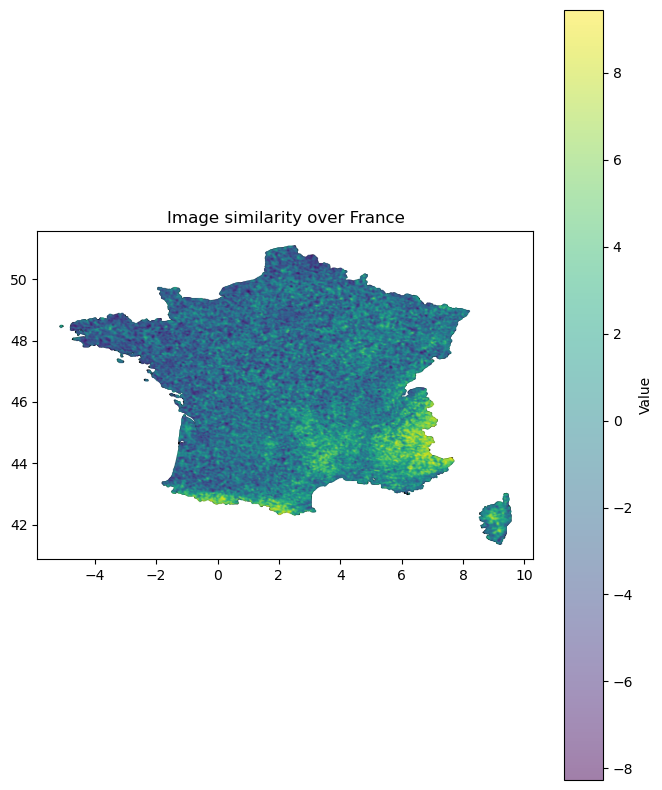

(48831, 2)
sims shape: torch.Size([1, 48831])
Switzerland


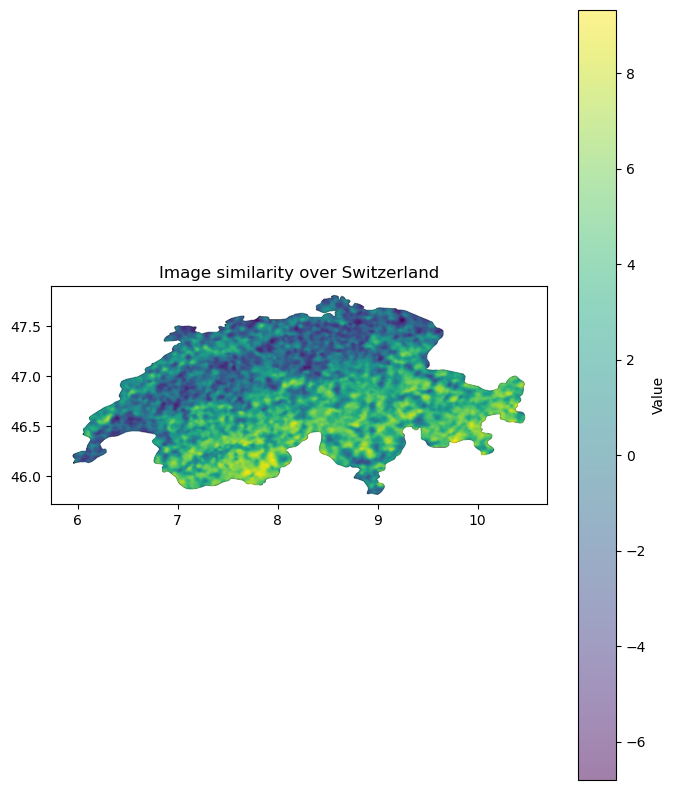

(48831, 2)


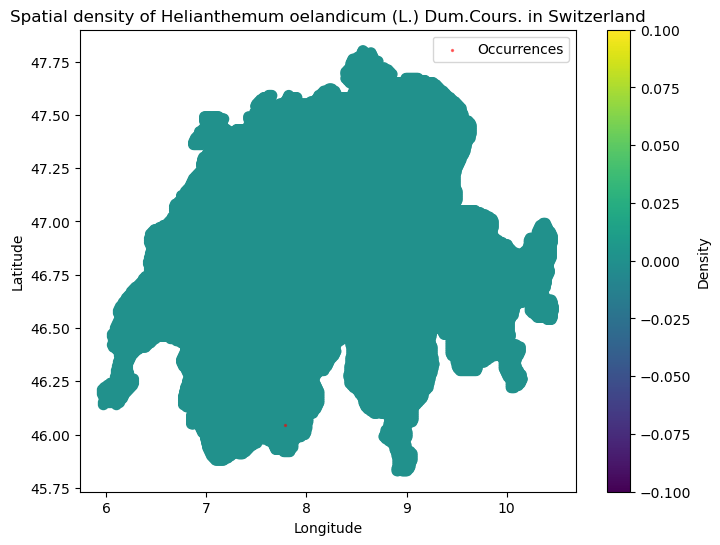

(25719, 2)


ValueError: No records for species 'Helianthemum oelandicum (L.) Dum.Cours.' found inside France

In [8]:
name_specie="Helianthemum oelandicum (L.) Dum.Cours."
def name_to_image(name_specie):
    print(swiss_dictionary.columns)
    # Find gbifID from name
    matches = dictionary[dictionary["scientificName"] == name_specie]
    gbif=matches["gbifID"].iloc[0]
    print(gbif)
    #Find index from gbifID
    matches = swiss_dictionary[swiss_dictionary["gbifID"] == gbif]
    index=matches.index.tolist()[0]
    print("index:", index)
    #then find image path from the index.
    image_path=f"swiss_images/all_images/{index}_{gbif}.jpg"
    #finally! ...
    return image_path

image_path=name_to_image(name_specie)



import utils
import importlib
importlib.reload(utils)
#Similarity map
utils.map_image(model, image_path, country="France", device="cuda", grid_resolution=0.03, save_path=None)
utils.map_image(model, image_path, country="Switzerland", device="cuda", grid_resolution=0.01, save_path=None)

#actual presence point
dictionary=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_sciName_countrycode")
utils.plot_species_density(dictionary,name_specie, "Switzerland", grid_resolution=0.01, bandwidth=0.5)
utils.plot_species_density(dictionary, name_specie, "France", grid_resolution=0.05, bandwidth=0.5)

### Visualization for same specie variations

In [ ]:
# Count how many times each species appears
species_counts = dictionary["scientificName"].value_counts()

max_count=species_counts.max()
print(max_count)
# Keep only species that appear exactly once
prevalent_specie_name = species_counts[species_counts == max_count].index #could be a problem if not unique? ok here
print(prevalent_specie_name)

# Filter the dataframe to the prevalent specie
prevalent_specie_occurences = dictionary[dictionary["scientificName"]==prevalent_specie_name]

# Further filter to countryCode == "CH"
prevalent_specie_occurences = prevalent_specie_occurences[prevalent_specie_occurences["countryCode"] == "CH"]

# Print how many such species there are
print(len(prevalent_specie_occurences))



18158
Index(['Alliaria petiolata (M.Bieb.) Cavara & Grande'], dtype='object', name='scientificName')


AttributeError: 'Index' object has no attribute 'iloc'

### Specie name struggle

Bioclip takes the specie name with the 7 level hierarchical format, followed by the vernacular name when available. 
Below, we turn the classification from gbif to that format (e.g. removing one of the Genus name, which is present twice for some reason)

In [12]:
import pandas as pd
def check_genus_repetition(df, k=10):
    """
    Check if the genus is repeated in higherClassification for the first k rows.
    
    Args:
        df: pandas DataFrame containing columns 'higherClassification' and 'genus'
        k: number of rows to check
    
    Returns:
        List of dicts for rows where the genus is NOT repeated
    """
    mismatches = []
    
    for idx, row in df.head(k).iterrows():
        hierarchy = row['higherClassification'].split()
        genus_column = row['genus']
        
        if len(hierarchy) < 2:
            mismatches.append({
                'row': idx,
                'reason': 'higherClassification too short',
                'hierarchy': row['higherClassification'],
                'genus_column': genus_column
            })
            continue
        
        # Compare second-to-last token with genus column
        genus_in_hierarchy = hierarchy[-2]
        if genus_in_hierarchy != genus_column:
            mismatches.append({
                'row': idx,
                'genus_in_hierarchy': genus_in_hierarchy,
                'genus_column': genus_column,
                'hierarchy': row['higherClassification']
            })
    
    if len(mismatches) == 0:
        print(f"All first {k} rows repeat the genus as expected.")
    else:
        print(f"{len(mismatches)} rows out of {k} do NOT repeat the genus.")
        for m in mismatches:
            print(m)
    
    return mismatches

dictionary=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_higherClassification_sciName_countrycode")
check_genus_repetition(dictionary, k=10)


AttributeError: 'float' object has no attribute 'split'

In [3]:
import pandas as pd
pd.set_option('display.max_rows', None)
full_dict=pd.read_csv("embeddings_data_and_dictionaries/data_plantnet_obsevations/occurrence.txt", sep="\t")
full_dict.isna().sum()


/tmp/ipykernel_3261212/3075721013.py:3: DtypeWarning: Columns (211) have mixed types. Specify dtype option on import or set low_memory=False.
  full_dict=pd.read_csv("embeddings_data_and_dictionaries/data_plantnet_obsevations/occurrence.txt", sep="\t")


gbifID                                       0
accessRights                           2592699
bibliographicCitation                  2592699
language                               2592699
license                                      0
modified                               2592699
publisher                                    0
references                                   0
rightsHolder                           2592699
type                                   2592699
institutionID                          2592699
collectionID                           2592699
datasetID                              2592699
institutionCode                        2592699
collectionCode                         2592699
datasetName                            2592699
ownerInstitutionCode                   2592699
basisOfRecord                                0
informationWithheld                    2581259
dataGeneralizations                    2592699
dynamicProperties                      2592699
occurrenceID 

In [4]:
# Print rows where 'species' is NaN
df=full_dict
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_species_rows = df[df['species'].isna()]
print(missing_species_rows)




             gbifID  accessRights  bibliographicCitation  language    license  \
452071   5109434515           NaN                    NaN       NaN  CC_BY_4_0   
722331   5110155207           NaN                    NaN       NaN  CC_BY_4_0   
1970238  5109971212           NaN                    NaN       NaN  CC_BY_4_0   
2441441  5110130936           NaN                    NaN       NaN  CC_BY_4_0   
2526804  5110059275           NaN                    NaN       NaN  CC_BY_4_0   

         modified publisher  \
452071        NaN  Pl@ntNet   
722331        NaN  Pl@ntNet   
1970238       NaN  Pl@ntNet   
2441441       NaN  Pl@ntNet   
2526804       NaN  Pl@ntNet   

                                                references  rightsHolder  \
452071   https://identify.plantnet.org/k-north-central-...           NaN   
722331   https://identify.plantnet.org/k-southwestern-e...           NaN   
1970238  https://identify.plantnet.org/k-southwestern-e...           NaN   
2441441  https://ident

In [19]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option("display.max_colwidth", None)
dict=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_all_taxons")
row=dict.loc[0:9]
row["taxa_bioclip"]

0                        Plantae Tracheophyta Magnoliopsida Lamiales Lamiaceae Glechoma hederacea
1                         Plantae Tracheophyta Magnoliopsida Rosales Rosaceae Pyracantha coccinea
2                 Plantae Tracheophyta Magnoliopsida Sapindales Simaroubaceae Ailanthus altissima
3                  Plantae Tracheophyta Magnoliopsida Ranunculales Papaveraceae Chelidonium majus
4                         Plantae Tracheophyta Magnoliopsida Asterales Asteraceae Centaurea jacea
5    Plantae Tracheophyta Magnoliopsida Caryophyllales Plumbaginaceae Ceratostigma plumbaginoides
6               Plantae Tracheophyta Magnoliopsida Ranunculales Ranunculaceae Helleborus foetidus
7           Plantae Tracheophyta Magnoliopsida Boraginales Hydrophyllaceae Phacelia tanacetifolia
8                          Plantae Tracheophyta Magnoliopsida Cornales Cornaceae Cornus sanguinea
9                  Plantae Tracheophyta Magnoliopsida Caryophyllales Tamaricaceae Tamarix gallica
Name: taxa_bioclip, 

In [ ]:
import open_clip
import utils
import importlib
import torch
importlib.reload(utils)

model, preprocess_train, processor = open_clip.create_model_and_transforms('hf-hub:imageomics/bioclip-2')
tokenizer = open_clip.get_tokenizer('hf-hub:imageomics/bioclip-2')
model = model.to("cuda")
model.eval()

embeddings=utils.get_species_emb(torch.tensor(range(10)), row, model,tokenizer)